In [681]:
import pandas as pd
import numpy as np
from datetime import datetime
import itertools
from dateutil import relativedelta


In [276]:
dfRev = pd.read_csv('/Users/heathercohen/Desktop/SN___DA_Project_Revenue_Data.csv')
dfRev.head()

,member_ID,Invoice Item: Charge Amount,Product: Name,Invoice: Invoice Date
0,11189.0,579.0,SnacksPlus,2015-07-24
1,11189.0,-100.0,SnacksPlus,2015-07-24
2,9604.0,579.0,SnacksPlus,2015-07-24
3,9604.0,-100.0,SnacksPlus,2015-07-24
4,5609.0,299.0,SnacksPlus,2015-07-24


In [259]:
dfMem = pd.read_csv('/Users/heathercohen/Desktop/SN____DA_Project_Member_Data.csv')
dfMem.head()

,member_ID,Industry,Employees,Billing State/Province,Signed Up Date,Cancellation Date
0,1.0,Apparel & Fashion,2.0,California,10/14/16,10/24/17
1,2.0,Technology,39.0,Utah,3/13/18,NaN
2,3.0,Retail,300.0,California,6/27/18,NaN
3,4.0,Consulting,38.0,California,4/5/18,NaN
4,5.0,Energy,25.0,Texas,1/22/18,NaN


In [275]:
#Change dates to datetime format
dfRev['Invoice: Invoice Date']=pd.to_datetime(dfRev['Invoice: Invoice Date'], format='%m/%d/%y')

In [261]:
dfMem['Signed Up Date']=pd.to_datetime(dfMem['Signed Up Date'], format='%m/%d/%y')
dfMem['Cancellation Date']=pd.to_datetime(dfMem['Cancellation Date'], format='%m/%d/%y')

In [262]:
#Do the cancellation dates make sense? 
cancellationbeforesignup = dfMem[(dfMem['Signed Up Date']> (dfMem['Cancellation Date']))]
cancellationbeforesignup.head()

,member_ID,Industry,Employees,Billing State/Province,Signed Up Date,Cancellation Date
111,112.0,Education,11.0,California,2015-06-26,2015-01-01
622,623.0,Real Estate,6.0,New York,2017-12-28,2017-12-21
975,976.0,Finance,6.0,New York,2017-09-28,2017-09-21
1454,1455.0,Entertainment,30.0,New York,2017-11-29,2017-11-13
1476,1477.0,Education,NaN,Florida,2017-11-30,2017-03-01


In [662]:
len(cancellationbeforesignup)
print(len(cancellationbeforesignup),"not so many")
print("But it seems like one date is really heavily represented")
print(cancellationbeforesignup['Cancellation Date'].value_counts().head())

print("Seemed like Jan 1st 2015 is probably the nonsense date people put in Salesforce when they don't know or are trying to code for something else")

#Per Rick, 2015-01-01 cancellation dates mean they are still subscribed so they should be cleaned to be NAN
dfMem['Cancellation Date']=dfMem['Cancellation Date'].replace(['2015-01-01'], None)



77 not so many
But it seems like one date is really heavily represented
2015-01-01    55
2017-03-01     1
2015-10-21     1
2016-10-28     1
2017-05-09     1
Name: Cancellation Date, dtype: int64
Seemed like Jan 1st 2015 is probably the nonsense date people put in Salesforce when they don't know or are trying to code for something else


/Users/heathercohen/anaconda/lib/python3.5/site-packages/pandas/core/missing.py:51: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


In [675]:
dfMem['Months Active']=dfMem['Cancellation Date'].dt.to_period('M') - dfMem['Signed Up Date'].dt.to_period('M')
print(dfMem['Months Active'].mean())
#print(dfMem['Industry'].value_counts())

dfMem['Months Active']=pd.to_numeric(dfMem['Months Active'], errors='coerce')

6.496676456948523


In [665]:
#Drop people without a signup date because we can't analyze them, but 163 isn't a huge percent
print(len(dfMem)-len(dfMem[dfMem['Signed Up Date'].notnull()]), "dropped")
print((163/(len(dfMem)))*100, '%')

163 dropped
1.4268207282913166 %


In [684]:
dfAverages=dfMem.groupby(['Industry'])['Months Active'].describe()
dfAverages

,count,mean,std,min,25%,50%,75%,max
Industry,,,,,,,,
Accounting,204.0,5.279412,5.361362,0.0,2.00,3.0,6.00,27.0
Advertising & Marketing,489.0,6.785276,6.541866,-6.0,3.00,4.0,10.00,32.0
Agriculture,14.0,7.142857,7.734609,0.0,2.25,3.0,11.25,24.0
Apparel,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apparel & Fashion,67.0,5.597015,5.578801,-5.0,2.00,3.0,8.00,23.0
"Arts, Entertainment & Media",390.0,7.215385,7.274972,-23.0,2.00,5.0,10.00,37.0
Auto,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Banking,101.0,5.297030,5.204891,-5.0,2.00,3.0,8.00,28.0
Biotechnology,87.0,6.873563,7.032821,0.0,2.00,4.0,8.50,29.0


In [683]:
dfAverages.to_csv("/Users/heathercohen/Desktop/SNAverages.csv")

In [666]:
#Does every customer get an invoice every month they are active/not cancelled? What is the measure of active? Billed or just not cancelled?
#Every invoice in July 2015, the first month of data given 
July=dfRev[(dfRev['Invoice: Invoice Date'] < "2015-08-01" )]
print(len(July['member_ID'].value_counts()), "unique members billed in July 2015")

132 unique members billed in July 2015


In [667]:
#Let's compare that to the number of members who are active in July 2015
Julypt2=dfMem[(dfMem['Signed Up Date']< "2015-07-01") & 
              ((dfMem['Cancellation Date']>"2015-07-31") | (dfMem['Cancellation Date'].isnull()))]

print(len(Julypt2), "members who have a start date before July and a cancel date either after July or have no cancel date")
print(len(Julypt2), "members who haven't canceled in July >", len(July['member_ID'].value_counts()), "unique members billed in July")
print("Conclusion: There must be a way to pause membership or people are ordering one offs or something so members should count as active in a month based on this definition, not on whether they had an invoice issued in every month")

224 members who have a start date before July and a cancel date either after July or have no cancel date
224 members who haven't canceled in July > 132 unique members billed in July
Conclusion: There must be a way to pause membership or people are ordering one offs or something so members should count as active in a month based on this definition, not on whether they had an invoice issued in every month


In [668]:
# customer churn is 
# ((subset of CustomersAtBeginningofMonth who cancelled before LastofMonth))/(people who had signed up and not canceled by FirstofMonth)

#Let's do one hard-coding to check the process 

#People who signed up before July, and either cancelled in July or have never cancelled

CustomersAtBeginningofJuly=dfMem[(dfMem['Signed Up Date']< "2015-07-01") & 
              ((dfMem['Cancellation Date']>="2015-07-01") | (dfMem['Cancellation Date'].isnull()))]


print(len(CustomersAtBeginningofJuly), "People who signed up before July, and either cancelled in July or have never cancelled")


PeopleWhoLeftInJuly =CustomersAtBeginningofJuly[(CustomersAtBeginningofJuly['Cancellation Date']<"2015-08-01")]


print(len(PeopleWhoLeftInJuly), " of those same people cancelled sometime during July")


JulyLoss=len(PeopleWhoLeftInJuly)/len(CustomersAtBeginningofJuly)


print(JulyLoss*100, "% customer churn rate for July 2015")



238 People who signed up before July, and either cancelled in July or have never cancelled
14  of those same people cancelled sometime during July
5.88235294117647 % customer churn rate for July 2015


In [669]:
LastOfMonths = pd.date_range(dfRev['Invoice: Invoice Date'].min(),dfRev['Invoice: Invoice Date'].max(), freq='1M') 

FirstOfMonths = pd.date_range("2015-06-01", periods=len(LastOfMonths), freq='1M') + pd.offsets.MonthBegin(1)


In [670]:
NextFirsts = FirstOfMonths[1:]
NextLasts = LastOfMonths[1:]
print(NextFirsts)
print(NextLasts)

DatetimeIndex(['2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01'],
              dtype='datetime64[ns]', freq='MS')
DatetimeIndex(['2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30',
               '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31',
               '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31'

In [747]:

#change the 55 incidence cancellation date to be NAT before running loop
listofpeoplewholeft=[]
listofpeopleatbeg=[]
customerCR=[]
numofpeoplewholeft=[]
numofpeopleatbeg=[]
listofindustatbeg=[]
listofindusleft=[]
listofcities=[]

for month in FirstOfMonths:
    peoplewholeft=[]
    peopleatbeg=[]
    indusatbeg=[]
    indusleft=[]
    cities=[]
    CusAtBeg=0
    PeopleWhoLeftInMonth=0
    for index, row in dfMem.iterrows():
        if ((row['Signed Up Date'] < month) & (row['Cancellation Date']>=month or pd.isnull(row['Cancellation Date']))):
            CusAtBeg+=1
            peopleatbeg.append(row["member_ID"])
            indusatbeg.append(row['Industry'])
            cities.append(row['Billing State/Province'])
            if row['Cancellation Date']<month+1:
                PeopleWhoLeftInMonth+=1
                peoplewholeft.append(row["member_ID"])
                indusleft.append(row['Industry'])
    listofpeoplewholeft.append(peoplewholeft)
    listofpeopleatbeg.append(peopleatbeg)
    churn = (PeopleWhoLeftInMonth/CusAtBeg)*100
    customerCR.append(churn)
    numofpeoplewholeft.append(PeopleWhoLeftInMonth)
    numofpeopleatbeg.append(CusAtBeg)
    listofindustatbeg.append(indusatbeg)
    listofindusleft.append(indusleft)
    listofcities.append(cities)
        
    #print(CusAtBeg, month.strftime("customers at the beginning of the month of %b %y"))
    #print("Of those customers", PeopleWhoLeftInMonth, month.strftime("people left by the end of month of %b %y") )
    #print("Which makes the customer churn rate for the month", (PeopleWhoLeftInMonth/CusAtBeg)*100, "%" )
    




In [749]:
valuecountsindusleft=[]
valuecountsindusbeg=[]
valuecountscities=[]

for left,beg,cit in zip(listofindusleft,listofindustatbeg,listofcities):
    valuecountsindusleft.append([[x,left.count(x)] for x in set(left)])
    valuecountsindusbeg.append([[x,beg.count(x)] for x in set(beg)])
    valuecountscities.append([[x,cit.count(x)] for x in set(cit)])
    

In [750]:
CustomerChurnDF= pd.DataFrame(
    {'Month': FirstOfMonths.strftime('%b %Y'),
     'First Of Month': FirstOfMonths,
     'Last of Month': LastOfMonths,
     '# Cust At Beginning Of Month':numofpeopleatbeg,
     '# Cust Who Left':numofpeoplewholeft,
     'Customers At Beginning Of Month': listofpeopleatbeg,
     'Customers Who Left During Month': listofpeoplewholeft,
     'Customer Churn Rate %': customerCR,
     'Industries At Beginning':listofindustatbeg,
     'Value Counts At Beginning':valuecountsindusbeg,
     'Industries Who Left': listofindusleft,
     'Value Counts of Who Left': valuecountsindusleft,
     'Cities Active This Month':listofcities,
     'Cities Value Counts':valuecountscities,
     
     
    })
CustomerChurnDF



,# Cust At Beginning Of Month,# Cust Who Left,Cities Active This Month,Cities Value Counts,Customer Churn Rate %,Customers At Beginning Of Month,Customers Who Left During Month,First Of Month,Industries At Beginning,Industries Who Left,Last of Month,Month,Value Counts At Beginning,Value Counts of Who Left
0,238,14,"[North Carolina, California, California, Wisco...","[[nan, 38], [Texas, 20], [Washington DC, 2], [...",5.882353,"[81.0, 2495.0, 2950.0, 2953.0, 3096.0, 3105.0,...","[2950.0, 2953.0, 3096.0, 3883.0, 5502.0, 5535....",2015-07-01,"[Biotechnology, Retail, Communications, Consul...","[Communications, Consulting, Consulting, Other...",2015-07-31,Jul 2015,"[[nan, 42], [Real Estate, 4], [Manufacturing, ...","[[nan, 4], [Consulting, 3], [Arts, Entertainme..."
1,337,14,"[North Carolina, California, nan, Colorado, Co...","[[nan, 41], [Texas, 29], [Washington DC, 6], [...",4.154303,"[81.0, 2495.0, 3105.0, 3106.0, 3107.0, 3108.0,...","[3838.0, 5495.0, 5548.0, 5658.0, 5662.0, 9442....",2015-08-01,"[Biotechnology, Retail, Electronics, Governmen...","[Technology, Arts, Entertainment & Media, nan,...",2015-08-31,Aug 2015,"[[nan, 49], [Real Estate, 5], [Manufacturing, ...","[[nan, 3], [Consulting, 1], [Arts, Entertainme..."
2,473,43,"[North Carolina, California, California, nan, ...","[[nan, 58], [Texas, 35], [Washington DC, 7], [...",9.090909,"[81.0, 2495.0, 2581.0, 3105.0, 3106.0, 3107.0,...","[3769.0, 5518.0, 5529.0, 5541.0, 5577.0, 5579....",2015-09-01,"[Biotechnology, Retail, Finance, Electronics, ...","[Communications, nan, nan, nan, Retail, Consul...",2015-09-30,Sep 2015,"[[nan, 66], [Real Estate, 7], [Manufacturing, ...","[[nan, 10], [Consulting, 3], [Retail, 3], [Not..."
3,695,77,"[New York, Texas, Texas, Texas, California, Ca...","[[nan, 73], [Texas, 67], [Washington DC, 7], [...",11.079137,"[23.0, 25.0, 26.0, 27.0, 29.0, 69.0, 81.0, 83....","[1703.0, 1925.0, 2048.0, 5171.0, 5242.0, 5498....",2015-10-01,"[Arts, Entertainment & Media, nan, nan, nan, I...","[Finance, Technology, Apparel & Fashion, Healt...",2015-10-31,Oct 2015,"[[nan, 87], [Real Estate, 11], [Media, 1], [Ma...","[[nan, 12], [Media, 1], [Real Estate, 3], [Com..."
4,806,83,"[New York, Ohio, Texas, Texas, Texas, Californ...","[[nan, 67], [Texas, 72], [Washington DC, 8], [...",10.297767,"[23.0, 24.0, 25.0, 26.0, 27.0, 29.0, 30.0, 52....","[218.0, 1633.0, 1711.0, 1816.0, 1906.0, 1926.0...",2015-11-01,"[Arts, Entertainment & Media, Consulting, nan,...","[Other, Engineering, Technology, Apparel & Fas...",2015-11-30,Nov 2015,"[[nan, 89], [Real Estate, 12], [Manufacturing,...","[[nan, 17], [Machinery, 1], [Finance, 3], [Ban..."
5,898,74,"[New York, Ohio, Texas, Texas, Texas, Californ...","[[nan, 50], [Texas, 86], [Washington DC, 9], [...",8.240535,"[23.0, 24.0, 25.0, 26.0, 27.0, 29.0, 30.0, 52....","[30.0, 664.0, 1931.0, 1946.0, 1962.0, 1973.0, ...",2015-12-01,"[Arts, Entertainment & Media, Consulting, nan,...","[Retail, Advertising & Marketing, Consulting, ...",2015-12-31,Dec 2015,"[[nan, 89], [Real Estate, 14], [Manufacturing,...","[[nan, 15], [Banking, 1], [Consulting, 9], [Re..."
6,997,102,"[New York, Ohio, Texas, Texas, Texas, Californ...","[[nan, 43], [Texas, 84], [Washington DC, 7], [...",10.230692,"[23.0, 24.0, 25.0, 26.0, 27.0, 29.0, 52.0, 69....","[166.0, 1671.0, 1763.0, 1957.0, 2009.0, 2495.0...",2016-01-01,"[Arts, Entertainment & Media, Consulting, nan,...","[Biotechnology, Technology, nan, Consulting, A...",2016-01-31,Jan 2016,"[[nan, 80], [Real Estate, 18], [Manufacturing,...","[[nan, 25], [Real Estate, 1], [Manufacturing, ..."
7,1154,102,"[New York, Ohio, Texas, Texas, Texas, Californ...","[[nan, 32], [Texas, 97], [Washington DC, 7], [...",8.838821,"[23.0, 24.0, 25.0, 26.0, 27.0, 29.0, 52.0, 68....","[78.0, 138.0, 142.0, 161.0, 206.0, 1719.0, 190...",2016-02-01,"[Arts, Entertainment & Media, Consulting, nan,...","[Technology, Advertising & Marketing, Healthca...",2016-02-29,Feb 2016,"[[nan, 69], [Real Estate, 23], [Manufacturing,...","[[nan, 12], [Consu

In [751]:
CustomerChurnDF.to_csv("/Users/heathercohen/Desktop/SNChurn.csv")

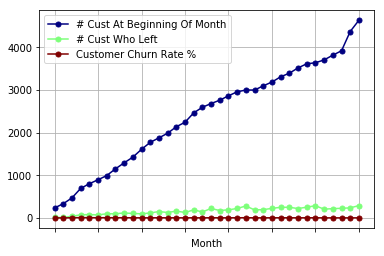

In [476]:
ax=CustomerChurnDF.plot(x='Month', y=['# Cust At Beginning Of Month', '# Cust Who Left', "Customer Churn Rate"], marker='.', markersize=10, colormap='jet')


In [548]:
#newdf=pd.DataFrame(CustomerChurnDF['Value Counts of Who Left'][1])
#newdf=newdf.set_index(0)
#newdf.pivot(index='date', columns='variable', values='value')


CustomerChurnDF['Value Counts of Who Left']

0     [[nan, 4], [Consulting, 3], [Arts, Entertainme...
1     [[nan, 3], [Consulting, 1], [Arts, Entertainme...
2     [[nan, 10], [Consulting, 3], [Retail, 3], [Not...
3     [[nan, 12], [Media, 1], [Real Estate, 3], [Com...
4     [[nan, 17], [Machinery, 1], [Finance, 3], [Ban...
5     [[nan, 15], [Banking, 1], [Consulting, 9], [Re...
6     [[nan, 25], [Real Estate, 1], [Manufacturing, ...
7     [[nan, 12], [Consulting, 8], [Retail, 2], [Con...
8     [[nan, 15], [Real Estate, 2], [Manufacturing, ...
9     [[nan, 10], [Real Estate, 7], [Education, 2], ...
10    [[nan, 7], [Communications, 4], [Education, 2]...
11    [[nan, 3], [Manufacturing, 1], [Communications...
12    [[nan, 11], [Real Estate, 6], [Manufacturing, ...
13    [[nan, 12], [Real Estate, 1], [Manufacturing, ...
14    [[nan, 9], [Real Estate, 5], [Education, 3], [...
15    [[nan, 8], [Real Estate, 3], [Manufacturing, 1...
16    [[nan, 5], [Real Estate, 7], [Education, 2], [...
17    [[nan, 3], [Real Estate, 6], [Manufacturin

In [292]:
#Revenue churn
####
#We define churn as the number (and percent) of members (or revenue) lost from one month to the next 
#while excluding new members (or revenue) added each month.


# Revenue Churn Rate = (revenue earned last unit - revenue earned this unit by the same people) / (revenue earned last unit)
#
#Merge revenue with customers at the beginning of july to figure out how much the CustomersAtBeginningofJuly spent in July
#Hard code one to test

JulyRev=CustomersAtBeginningofJuly.merge(dfRev, on="member_ID", how='left')
JulyRev=JulyRev[((JulyRev['Invoice: Invoice Date']>="2015-07-01") & (JulyRev['Invoice: Invoice Date']<="2015-07-31" ))]
print(JulyRev['Invoice Item: Charge Amount'].sum(), "July Revenue")


#There's no June data so have to look forward instead of back, which will make this August's Revenue Churn
#Merge customersatbeginningofjuly with August's invoices equals the sum those July people spent in August
AugRev=CustomersAtBeginningofJuly.merge(dfRev, on="member_ID", how='left')
AugRev=AugRev[((AugRev['Invoice: Invoice Date']>="2015-08-01") & (AugRev['Invoice: Invoice Date']<="2015-08-31" ))]
print(AugRev['Invoice Item: Charge Amount'].sum(), "August Revenue from those same people")

print(AugRev['Invoice Item: Charge Amount'].sum()-JulyRev['Invoice Item: Charge Amount'].sum(), "is revenue churn amount")
print(((AugRev['Invoice Item: Charge Amount'].sum()-JulyRev['Invoice Item: Charge Amount'].sum())/(AugRev['Invoice Item: Charge Amount'].sum()))*100,"% is the percent churn")

33101.86 July Revenue
31794.809999999998 August Revenue from those same people
-1307.050000000003 is revenue churn amount
-4.110891054231817 % is the percent churn


In [309]:
ListofRevs=[]

for month, last in zip(FirstOfMonths, LastOfMonths):
    MemberIdsAtBeginning=[]
    for index, row in dfMem.iterrows():
        if ((row['Signed Up Date'] < month) & (row['Cancellation Date']>=month or pd.isnull(row['Cancellation Date']))):
            MemberIdsAtBeginning.append(row['member_ID'])
    MonthRev=dfRev[dfRev['member_ID'].isin(MemberIdsAtBeginning)]
    MonthRev=MonthRev[((MonthRev['Invoice: Invoice Date']>=month)& (MonthRev['Invoice: Invoice Date']<=last))]
    #print(MonthRev.head())
    print(len(MemberIdsAtBeginning), month.strftime("people at the start of month of %b %y"))
    print(MonthRev['Invoice Item: Charge Amount'].sum(),month.strftime("%b %y revenue"))
    ListofRevs.append(MonthRev['Invoice Item: Charge Amount'].sum())
    

print(ListofRevs)



238 people at the start of month of Jul 15
33101.86 Jul 15 revenue
337 people at the start of month of Aug 15
54550.92999999999 Aug 15 revenue
473 people at the start of month of Sep 15
92993.07 Sep 15 revenue
695 people at the start of month of Oct 15
147300.87999999998 Oct 15 revenue
806 people at the start of month of Nov 15
199498.63 Nov 15 revenue
898 people at the start of month of Dec 15
221279.83000000002 Dec 15 revenue
997 people at the start of month of Jan 16
273868.45 Jan 16 revenue
1154 people at the start of month of Feb 16
304712.79 Feb 16 revenue
1295 people at the start of month of Mar 16
383755.2 Mar 16 revenue
1428 people at the start of month of Apr 16
440770.01 Apr 16 revenue
1612 people at the start of month of May 16
491655.50999999995 May 16 revenue
1775 people at the start of month of Jun 16
524614.0899999999 Jun 16 revenue
1881 people at the start of month of Jul 16
592557.45 Jul 16 revenue
1989 people at the start of month of Aug 16
654128.7 Aug 16 revenue
21

In [410]:
listofMonthRevs=[]
listofNextMonthRevs=[]
listofchurnamount=[]
listofchurnpercent=[]


for (people, first, last, nextfirst, nextlast) in zip(listofpeopleatbeg, FirstOfMonths, LastOfMonths, NextFirsts, NextLasts):  
    Revdf=dfRev[dfRev['member_ID'].isin(people)]
    MonthRevdf=Revdf[((Revdf['Invoice: Invoice Date']>=first)& (Revdf['Invoice: Invoice Date']<=last))]
    NextRevdf=Revdf[((Revdf['Invoice: Invoice Date']>=nextfirst)& (Revdf['Invoice: Invoice Date']<=nextlast))]
    MonthRev=MonthRevdf['Invoice Item: Charge Amount'].sum()
    NextRev=NextRevdf['Invoice Item: Charge Amount'].sum()
    print(MonthRev)
    print(NextRev)
    print(first.strftime('%b %Y'))
    print(NextRev-MonthRev, "is revenue churn amount")
    print(((NextRev-MonthRev)/NextRev)*100, "% rev churn")
    listofMonthRevs.append(MonthRev)
    listofNextMonthRevs.append(NextRev)
    listofchurnamount.append(NextRev-MonthRev)
    listofchurnpercent.append(((NextRev-MonthRev)/NextRev)*100)
    
    #print(len(MonthRevdf['member_ID'].unique()))
    #print(len(NextRevdf['member_ID'].unique()))
    


33101.86
31794.809999999998
Jul 2015
-1307.050000000003 is revenue churn amount
-4.110891054231817 % rev churn
54550.92999999999
59086.81
Aug 2015
4535.880000000005 is revenue churn amount
7.676637137797767 % rev churn
92993.07
85785.17000000001
Sep 2015
-7207.899999999994 is revenue churn amount
-8.402268130960158 % rev churn
147300.87999999998
151323.43
Oct 2015
4022.5500000000175 is revenue churn amount
2.6582466442903243 % rev churn
199498.63
178753.79000000004
Nov 2015
-20744.839999999967 is revenue churn amount
-11.605258831155393 % rev churn
221279.83000000002
215225.27
Dec 2015
-6054.560000000027 is revenue churn amount
-2.8131269158124543 % rev churn
273868.45
248420.32
Jan 2016
-25448.130000000005 is revenue churn amount
-10.243980846655381 % rev churn
304712.79
295515.93999999994
Feb 2016
-9196.850000000035 is revenue churn amount
-3.1121333082743474 % rev churn
383755.2
362275.69999999995
Mar 2016
-21479.50000000006 is revenue churn amount
-5.929047959882504 % rev churn
440

In [552]:
print(len(listofchurnamount),len(listofchurnpercent),len(listofNextMonthRevs))

listofchurnamount.append('NaN')
listofchurnpercent.append('NaN')
listofNextMonthRevs.append('NaN')
listofMonthRevs.append('NaN')

print(len(listofchurnamount),len(listofchurnpercent),len(listofNextMonthRevs), len(FirstOfMonths), len(LastOfMonths), len(listofMonthRevs))

35 35 35
36 36 36 36 36 36


In [553]:
RevenueChurnDF= pd.DataFrame(
    {'Month': FirstOfMonths.strftime('%b %Y'),
     'First Of Month': FirstOfMonths,
     'Last of Month': LastOfMonths,
     'Month': FirstOfMonths.strftime('%b %Y'),
     'Revenue From Customers Active on First For This Month':listofMonthRevs,
     'Revenue From Same Customers in Next Month': listofNextMonthRevs,
     'Revenue Churn Amount, $':listofchurnamount,
     'Revenue Churn Percent, %':listofchurnpercent,  
    })
RevenueChurnDF



In [ ]:
RevenueChurnDF.to_csv("/Users/heathercohen/Desktop/SNRevenue.csv")

In [710]:
industrylist=dfMem['Industry'].unique()
industrylist=np.append(industrylist,'Month')

valuecountDF=pd.DataFrame( columns=industrylist)
valuecountDF

,Apparel & Fashion,Technology,Retail,Consulting,Energy,"Arts, Entertainment & Media",Finance,Education,Healthcare,Government,...,Real Estate,Not For Profit,Recreation & Travel,Food & Beverage,Machinery,Hospitality,Auto,Media,Apparel,Month


In [727]:
newrows=[]

for x, y, z in zip(CustomerChurnDF['Value Counts of Who Left'], FirstOfMonths.strftime('%b %Y'), range(len(FirstOfMonths.strftime('%b %Y')))):
    #print(x,y)
    newrow=pd.DataFrame(columns=dfMem['Industry'].unique())
    newrow.loc[z,'Month']=y
    for column in (valuecountDF.columns):
        #print(column)
        for i in x:
            #print(i)
            if column ==i[0]:
                #print("True")
                #print(i[0],i[1])
                #print(column, i[0])
                newrow.loc[z, column]=y=i[1]
    print(newrow)
    newrows.append(newrow)

                
                
                
                
                
                


  Apparel & Fashion Technology Retail Consulting Energy  \
0               NaN          1    NaN          3    NaN   

  Arts, Entertainment & Media Finance Education Healthcare Government  \
0                           1     NaN       NaN        NaN        NaN   

     ...    Real Estate Not For Profit Recreation & Travel Food & Beverage  \
0    ...            NaN            NaN                 NaN             NaN   

  Machinery Hospitality Auto Media Apparel     Month  
0       NaN         NaN  NaN   NaN     NaN  Jul 2015  

[1 rows x 42 columns]
  Apparel & Fashion Technology Retail Consulting Energy  \
1                 1          3    NaN          1    NaN   

  Arts, Entertainment & Media Finance Education Healthcare Government  \
1                           2       1       NaN        NaN        NaN   

     ...    Real Estate Not For Profit Recreation & Travel Food & Beverage  \
1    ...            NaN            NaN                   1             NaN   

  Machinery Hospitali

   Apparel & Fashion Technology Retail Consulting Energy  \
20                 4         53     10         12      1   

   Arts, Entertainment & Media Finance Education Healthcare Government  \
20                          16      15         3          9        NaN   

      ...    Real Estate Not For Profit Recreation & Travel Food & Beverage  \
20    ...              6              2                 NaN               1   

   Machinery Hospitality Auto Media Apparel     Month  
20       NaN         NaN  NaN   NaN     NaN  Mar 2017  

[1 rows x 42 columns]
   Apparel & Fashion Technology Retail Consulting Energy  \
21                 2         54      4         13      3   

   Arts, Entertainment & Media Finance Education Healthcare Government  \
21                          17       6        10          5          2   

      ...    Real Estate Not For Profit Recreation & Travel Food & Beverage  \
21    ...              3            NaN                   4               5   

   Mach

In [789]:
industriesleavingDF = pd.concat(newrows)
industriesleavingDF=industriesleavingDF.set_index('Month')
industriesleavingDF.head()
industriesleavingDF.mean().sort_values(ascending=False).head(10)
industriesleavingDF=industriesleavingDF[['Technology','Advertising & Marketing','Finance', 'Consulting','Arts, Entertainment & Media' ]]

In [738]:
newrows2=[]

for x, y, z in zip(CustomerChurnDF['Value Counts At Beginning'], FirstOfMonths.strftime('%b %Y'), range(len(FirstOfMonths.strftime('%b %Y')))):
    #print(x,y)
    newrow=pd.DataFrame(columns=dfMem['Industry'].unique())
    newrow.loc[z,'Month']=y
    for column in (valuecountDF.columns):
        #print(column)
        for i in x:
            #print(i)
            if column ==i[0]:
                #print("True")
                #print(i[0],i[1])
                #print(column, i[0])
                newrow.loc[z, column]=y=i[1]
    #print(newrow)
    newrows2.append(newrow)

In [788]:
industriesatbegDF = pd.concat(newrows2)
industriesatbegDF=industriesatbegDF.set_index('Month')
#industriesatbegDF.head()
#industriesatbegDF.mean().sort_values(ascending=False).head(10)
industriesatbegDF=industriesatbegDF[['Technology', 'Auto', 'Consulting', 'Advertising & Marketing','Finance']]

In [790]:
industriesatbegDF.to_csv("/Users/heathercohen/Desktop/SNIndustBeg.csv")

industriesleavingDF.to_csv("/Users/heathercohen/Desktop/SNIndustLeave.csv")

In [752]:
dfMem.columns

Index(['member_ID', 'Industry', 'Employees', 'Billing State/Province',
       'Signed Up Date', 'Cancellation Date', 'Months Active'],
      dtype='object')

In [754]:
CityList=dfMem['Billing State/Province'].unique()
CityList=np.append(CityList,'Month')

valuecountDF2=pd.DataFrame( columns=CityList)
valuecountDF2

,California,Utah,Texas,Michigan,New Hampshire,New York,Florida,Iowa,Washington,Indiana,...,Arkansas,Hawaii,Alaska,West Virginia,Rhode Island,Wyoming,North Dakota,Guam,Ontario,Month


In [756]:
newrows3=[]

for x, y, z in zip(CustomerChurnDF['Cities Value Counts'], FirstOfMonths.strftime('%b %Y'), range(len(FirstOfMonths.strftime('%b %Y')))):
    #print(x,y)
    newrow3=pd.DataFrame(columns=CityList)
    newrow3.loc[z,'Month']=y
    for column in (valuecountDF2.columns):
        #print(column)
        for i in x:
            #print(i)
            if column ==i[0]:
                #print("True")
                #print(i[0],i[1])
                #print(column, i[0])
                newrow3.loc[z, column]=y=i[1]
    print(newrow3)
    newrows3.append(newrow3)



  California Utah Texas Michigan New Hampshire New York Florida Iowa  \
0         93    1    20      NaN           NaN       18       1    1   

  Washington Indiana    ...    Arkansas Hawaii Alaska West Virginia  \
0          5       2    ...         NaN    NaN    NaN           NaN   

  Rhode Island Wyoming North Dakota Guam Ontario     Month  
0          NaN     NaN          NaN  NaN       1  Jul 2015  

[1 rows x 55 columns]
  California Utah Texas Michigan New Hampshire New York Florida Iowa  \
1        125    2    29      NaN             1       30       2    1   

  Washington Indiana    ...    Arkansas Hawaii Alaska West Virginia  \
1          7       3    ...         NaN    NaN    NaN           NaN   

  Rhode Island Wyoming North Dakota Guam Ontario     Month  
1          NaN     NaN          NaN  NaN       1  Aug 2015  

[1 rows x 55 columns]
  California Utah Texas Michigan New Hampshire New York Florida Iowa  \
2        165    3    35        3             1       55       

   California Utah Texas Michigan New Hampshire New York Florida Iowa  \
22        986   22   236       35            11      379      64    5   

   Washington Indiana    ...    Arkansas Hawaii Alaska West Virginia  \
22         83      24    ...           5      3    NaN             3   

   Rhode Island Wyoming North Dakota Guam Ontario     Month  
22            4     NaN            3  NaN     NaN  May 2017  

[1 rows x 55 columns]
   California Utah Texas Michigan New Hampshire New York Florida Iowa  \
23        988   24   234       37            10      385      72    5   

   Washington Indiana    ...    Arkansas Hawaii Alaska West Virginia  \
23         89      28    ...           5      3    NaN             2   

   Rhode Island Wyoming North Dakota Guam Ontario     Month  
23            6     NaN            3  NaN     NaN  Jun 2017  

[1 rows x 55 columns]
   California Utah Texas Michigan New Hampshire New York Florida Iowa  \
24       1006   25   248       41            10  

In [776]:
CitiesDF = pd.concat(newrows3)
CitiesDF=CitiesDF.set_index('Month')
CitiesDF.head()


,California,Utah,Texas,Michigan,New Hampshire,New York,Florida,Iowa,Washington,Indiana,...,Mississippi,Arkansas,Hawaii,Alaska,West Virginia,Rhode Island,Wyoming,North Dakota,Guam,Ontario
Month,,,,,,,,,,,,,,,,,,,,,
Jul 2015,93,1,20,NaN,NaN,18,1,1,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Aug 2015,125,2,29,NaN,1,30,2,1,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Sep 2015,165,3,35,3,1,55,8,1,7,5,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oct 2015,227,4,67,8,3,78,15,1,12,6,...,NaN,1,1,NaN,NaN,1,1,NaN,NaN,NaN
Nov 2015,264,6,72,8,3,89,19,1,19,6,...,NaN,1,1,NaN,NaN,1,1,NaN,NaN,NaN


In [792]:
CitiesDF.to_csv("/Users/heathercohen/Desktop/SNCities.csv")

In [777]:
CitiesDF.mean().sort_values(ascending=False).head(10)

California       778.250000
New York         280.861111
Texas            186.777778
Illinois         102.500000
Massachusetts     99.055556
Washington        74.055556
Florida           68.111111
Virginia          67.916667
Colorado          63.888889
Georgia           61.861111
dtype: float64

In [791]:
CitiesDF=CitiesDF[['California', 'New York', 'Texas', 'Illinois', 'Massachusetts']]